In [2]:
import scripts.read_land_use_no_gdal as land_use
import scripts.read_image_data as rid
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [3]:
model = pickle.load(open('models/area3/model.pickle', 'rb'))

In [4]:
to_predict = pickle.load(open('models/area3/to_predict.pickle', 'rb'))

In [5]:
X_new = to_predict.iloc[:, 2:-1]
cls_table = to_predict.iloc[:, :2]
del to_predict

In [6]:
model.set_params(n_jobs=1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [7]:
pred_new = model.predict(X_new)

In [8]:
cls_table['pred_label'] = pred_new
cls_map = cls_table.pivot(index='x', columns='y', values='pred_label')

In [9]:
array, unique_classes = pickle.load(open('models/area3/array_n_unique_classes.pickle', 'rb'))

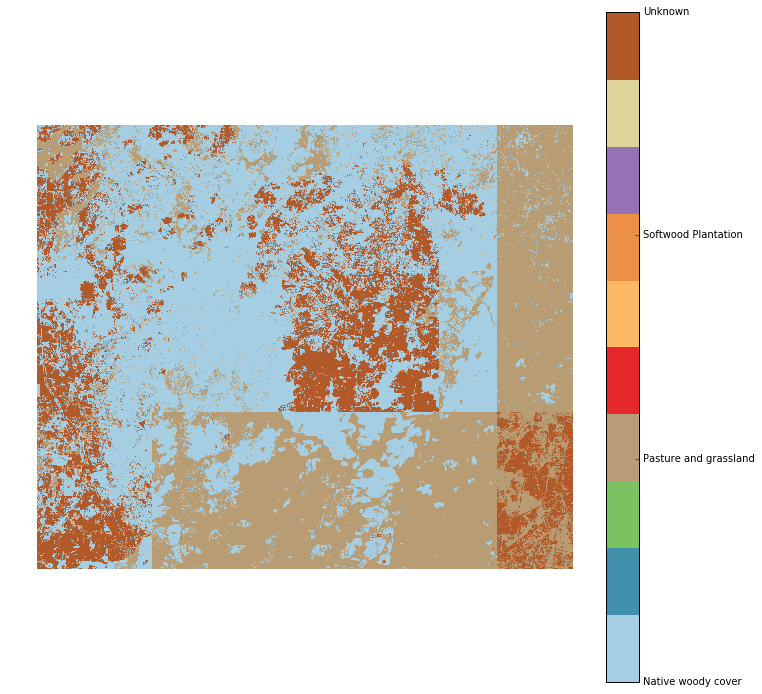

In [10]:
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(cls_map, cmap=plt.cm.get_cmap('Paired', len(unique_classes) - 1))
plt.colorbar(ticks=range(1, len(unique_classes)), format=plt.FuncFormatter(lambda val, loc: unique_classes[val]))
plt.show()

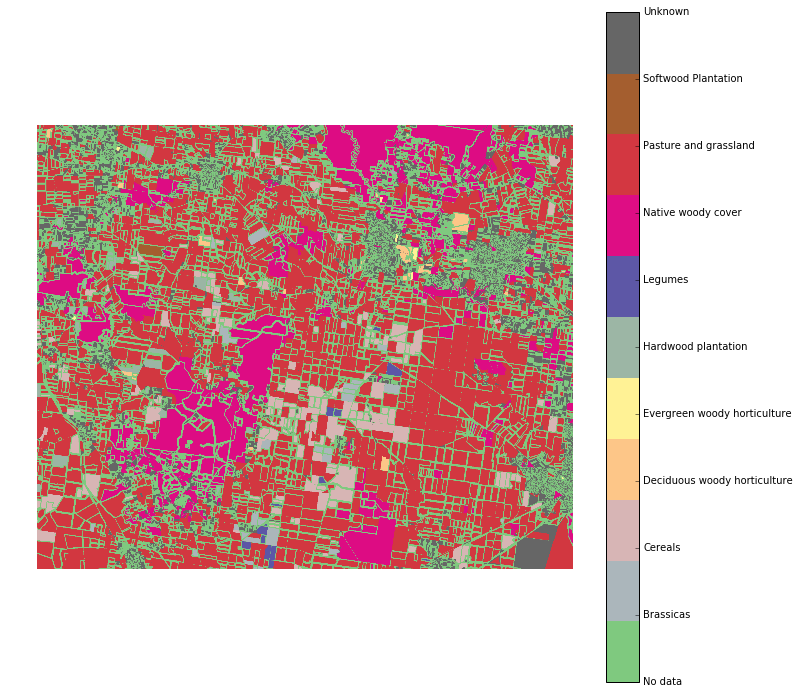

In [13]:
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(array, cmap=plt.cm.get_cmap('Accent', len(unique_classes)))
plt.colorbar(ticks=range(len(unique_classes)), format=plt.FuncFormatter(lambda val, loc: unique_classes[val]))
plt.show()